In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [4]:
pdf = sns.load_dataset("penguins")

In [5]:
pdf = pdf.dropna()

In [9]:
pdf = pdf.reset_index(drop=True)

In [10]:
pdf.head(3)

,index,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


#### we want to predict the weight of the penguins based on the flipper length

In [14]:
X = pdf["flipper_length_mm"]
y = pdf["body_mass_g"]

#### train-test split

In [12]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

#### model generation

In [36]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

In [29]:
X_train = np.array(X_train).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

In [23]:
#instantiating linear regression object
lm  = LinearRegression() # fit_intercept = True

In [24]:
# calculating the best fit by minimizing the loss function - calculating the model parameters - slope and intercept
model = lm.fit(X_train, y_train)

In [27]:
# model slope
print(model.coef_)
# model intercept
print(model.intercept_)

[[51.32743793]]
[-6118.66754338]


In [38]:
y_pred = model.predict(X_test)

In [39]:
#y_test - y_pred
compare = pd.DataFrame({"y_test":list(y_test), "y_pred":list(y_pred)})

In [40]:
compare

,y_test,y_pred
0,[3250.0],[3017.616407560008]
1,[4875.0],[5276.023676332345]
2,[4000.0],[3890.182852312955]
3,[3675.0],[4044.1651660928874]
4,[4050.0],[3736.200538533023]
...,...,...
95,[3400.0],[2812.306655853432]
96,[4675.0],[3890.182852312955]
97,[4000.0],[4506.112107432684]
98,[4100.0],[3736.200538533023]


#### model evaluation

In [45]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse

In [46]:
mse(y_test,y_pred)

138931.09920252115

In [48]:
mae(y_test,y_pred)

299.39047755852715

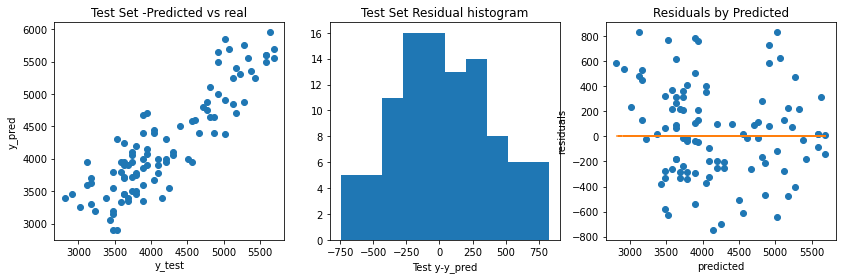

In [49]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscedasticity
# Does it resemble a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')